You should consider upgrading via the '/home/braulio/venv/bin/python3 -m pip install --upgrade pip' command.
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
The results of our simulated circuit are: 
{'11': 492, '00': 508}


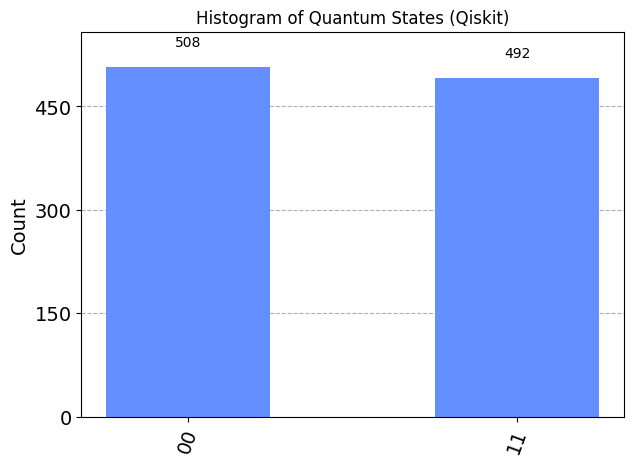

In [1]:
!pip install plotly 
# We use Qinterpreter to reproduce a basic quantum circuit that aims to generate one of the four Bell states.
# A Bell state is a type of entangled quantum state that is maximally entangled and represents a key component 
# in many quantum algorithms and quantum communication protocols. They arise from a superposition of the quantum bits' basis states |0⟩ and |1⟩.
# There are four Bell states, but the most common one is the "Bell state 00", defined by the equation

#|Ψ+⟩ = (1/√2)(|00⟩ + |11⟩)

#----------------------------------------------------------------------------- 
# Step 1) To generate the Bell state 00 across five distinct frameworks, 
# our initial step involves importing the five essential quantum libraries: 
# Qiskit, Pyquil, Cirq, Pennylane, and Braket
#-----------------------------------------------------------------------------

from quantumgateway.quantum_circuit import QuantumCircuit, QuantumGate
from quantumgateway.quantum_translator.braket_translator import BraketTranslator
from quantumgateway.quantum_translator.cirq_translator import CirqTranslator
from quantumgateway.quantum_translator.qiskit_translator import QiskitTranslator
from quantumgateway.quantum_translator.pennylane_translator import PennyLaneTranslator
from quantumgateway.quantum_translator.pyquil_translator import PyQuilTranslator
from quantumgateway.main import translate_to_framework, simulate_circuit

#---------------------------------------------------------------------------------------------------------   
# Step 2) Once this is done, we will create a circuit with two qubits and two classical bits, as follows:
#---------------------------------------------------------------------------------------------------------

n=2
circuit = QuantumCircuit(n,n) 

#--------------------------------------------------------------------------------------------------------- 
# We have created a quantum register with 2 qubits and created a classical register with 2 bits, 
# and both registers are included in the quantum circuit "QuantumCircuit". 
# This setup is essential because creating the initial Bell state requires two quantum bits and two classical registers for the simulation.
# Step 3) Once our registers are ready, we can start adding the specific gates to build our circuit.
#---------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------- 
# Bell State ∣00⟩
# |Ψ+⟩ = (1/√2)(|00⟩ + |11⟩)

circuit.add_gate(QuantumGate("h", [0]))
circuit.add_gate(QuantumGate("cnot", [0,1]))

# where the two specific gates: the Hadamard gate (H) to the first qubit [0], create a superposition, making the state (|00⟩ + |01⟩) / √2, 
# whereas the Controlled-NOT (cnot), with the first qubit, 0, as the control and the second qubit, 1, as the target. 
# This entangles the qubits and creates the Bell state (|00⟩ + |11⟩) / √2.
#--------------------------------------------------------------------------------------------------------- 

#--------------------------------------------------------------------------------------------------------
# Bell State ∣01⟩
# |Ψ-⟩ = (1/√2)(|00⟩ - |11⟩)

#To modify the given code to generate the Bell State ∣01⟩ instead of ∣00⟩, we need to make a small change in the gate sequence. 
# Specifically, we need to apply an X gate to the first qubit after applying the Hadamard gate to the first qubit. 

#circuit.add_gate(QuantumGate("h", [0]))
#circuit.add_gate(QuantumGate("x", [0]))  
#circuit.add_gate(QuantumGate("cnot", [0,1]))
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------- 
# Bell State ∣01⟩
# |φ+⟩ = (1/√2)(|01⟩ + |10⟩)

# To generate the Bell State ∣10⟩, we need to apply an X gate (Pauli-X gate) to the second qubit
# after applying the Hadamard gate to the first qubit 

#circuit.add_gate(QuantumGate("h", [0]))
#circuit.add_gate(QuantumGate("x", [1]))  
#circuit.add_gate(QuantumGate("cnot", [0, 1]))
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------- 
# Bell State ∣11⟩
# |φ-⟩ = (1/√2)(|01⟩ - |10⟩)
# For the Bell State ∣11⟩, we need to apply an X gate to both qubits after applying the Hadamard gate to the first qubit

#circuit.add_gate(QuantumGate("h", [0]))
#circuit.add_gate(QuantumGate("x", [0]))  # Apply X gate to the first qubit
#circuit.add_gate(QuantumGate("x", [1]))  # Apply X gate to the second qubit
#circuit.add_gate(QuantumGate("cnot", [0, 1]))
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------
#Step 4) To perform the simulation of our circuit, we implemented the measurement operation as follows:

circuit.add_gate(QuantumGate("MEASURE", [0,0]))
circuit.add_gate(QuantumGate("MEASURE", [1,1]))
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------
# Step 5) We choose the framework for displaying our simulation; for the sake of simplicity, 
# we opt firt for IBM's Qiskit

selected_framework = 'qiskit' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------
# Step 6) To visualize the circuit and ensure works correctly, 
# we use the "print_circuit()" to print the circuit

translated_circuit.print_circuit()
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------
# step 7) Finally, we simulate the circuit 

print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

# Plot the histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts, title='Histogram of Quantum States (Qiskit)')

In [2]:
# This will show that roughly half of the time, you'll measure '00' and the other half '11'—the specific outcome depends on the Bell state being created. 
# indicating that the qubits are in a maximally entangled Bell state.
# If we wish to obtain the result from any of the following quantum frameworks instead of qiskit: cirq, pennylane, pyquil, amazonbraket,
# let's choose Google's Cirq. In this case, the quantum circuit is given by


In [3]:
selected_framework = 'cirq' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

0: ───H───@───M('result0')───
          │
1: ───────X───M('result1')───


The results of our simulated circuit are: 
{'11': 505, '00': 495}


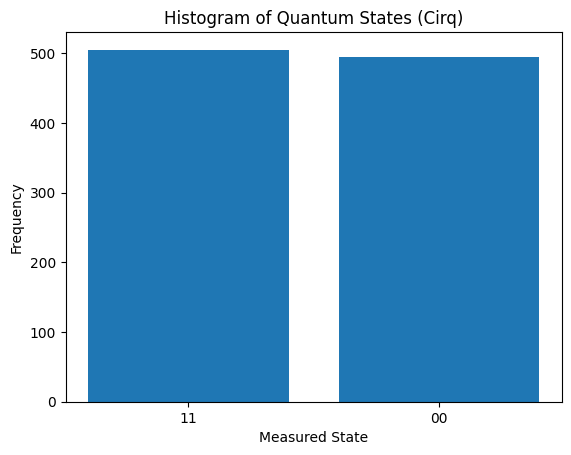

In [4]:
# and the visualization of the results are 

print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

# Importing the appropriate library for visualization in Cirq is crucial
import cirq
import matplotlib.pyplot as plt

# Plot the histogram
plt.bar(counts.keys(), counts.values())
plt.xlabel('Measured State')
plt.ylabel('Frequency')
plt.title('Histogram of Quantum States (Cirq)');


In [5]:
# we can proceed to see how the quantum circuit looks like in Rigetti's PyQuil 
selected_framework = 'pyquil' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()


DECLARE ro BIT[2]
H 0
CNOT 0 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]



The results of our simulated circuit are: 
{'11': 505, '00': 495}


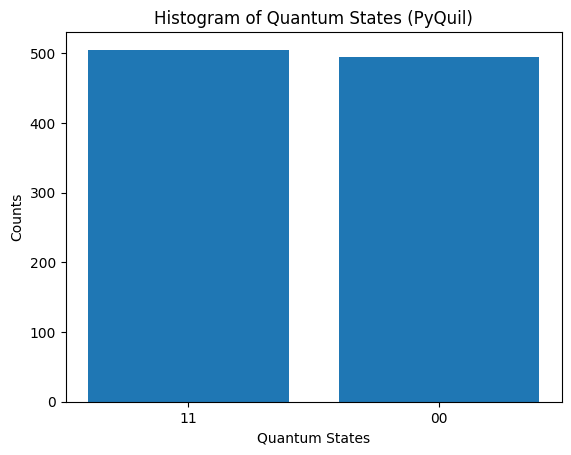

In [6]:
# Step 7) Simulate the circuit using the pyQuil simulator
print("The results of our simulated circuit are: ")
print(counts)

# Plot the histogram (for PyQuil)
# The histogram is plotted using matplotlib since PyQuil doesn't have a built-in histogram plotter like Qiskit.
import matplotlib.pyplot as plt

# Convert PyQuil result to a format compatible with plot_histogram
pyquil_counts = {format(int(state, 2), '0{}b'.format(n)): count for state, count in counts.items()}

plt.bar(pyquil_counts.keys(), pyquil_counts.values())
plt.xlabel('Quantum States')
plt.ylabel('Counts')
plt.title('Histogram of Quantum States (PyQuil)')
plt.show()

In [7]:
# we can proceed to see how the quantum circuit looks like in Xanadu's PennyLane
selected_framework = 'pennylane' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

0: ──H─╭●─┤  Sample[Z]
1: ────╰X─┤  Sample[Z]


The results of our simulated circuit are: 
{'11': 505, '00': 495}


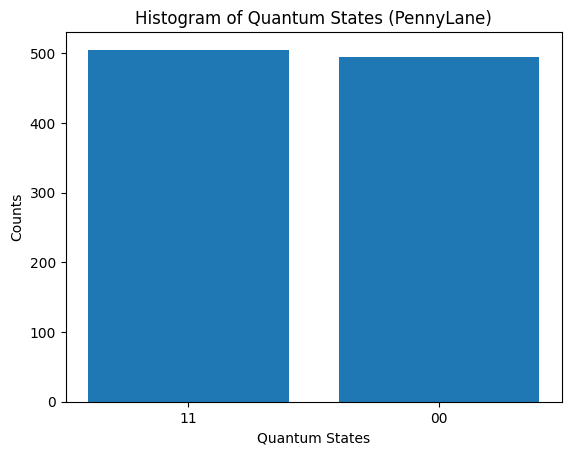

In [8]:
# Step 7) simulate the circuit using PennyLane
print("The results of our simulated circuit are: ")
print(counts)

# Plot the histogram (for PennyLane)
# The histogram is plotted using matplotlib since PennyLane doesn't have a built-in histogram plotter like Qiskit.
import matplotlib.pyplot as plt

# Convert PennyLane result to a format compatible with plot_histogram
pennylane_counts = {format(int(state, 2), '0{}b'.format(n)): count for state, count in counts.items()}

plt.bar(pennylane_counts.keys(), pennylane_counts.values())
plt.xlabel('Quantum States')
plt.ylabel('Counts')
plt.title('Histogram of Quantum States (PennyLane)')
plt.show()


In [9]:
# and finaly Amazon's Braket
selected_framework = 'amazonbraket' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|


The results of our simulated circuit are: 
{'11': 517, '00': 483}


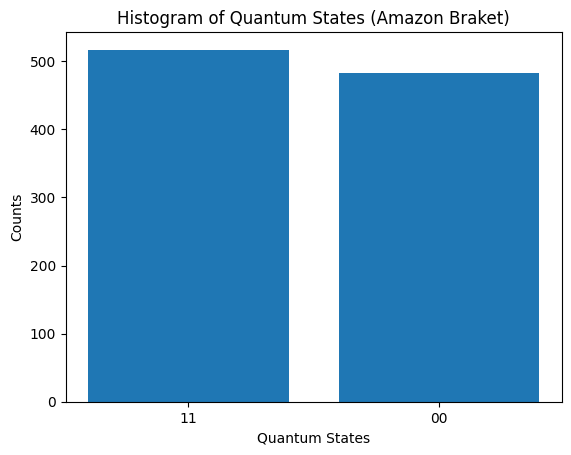

In [10]:
# Step 7) Finally, simulate the circuit using Amazon Braket
print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

# Plot the histogram (for Amazon Braket)
# The histogram is plotted using qiskit.visualization.plot_histogram, as Amazon Braket does not have a direct histogram plotter
# Plot the histogram (for Amazon Braket)
from braket.aws import AwsDevice
from braket.devices import LocalSimulator
# Convert Amazon Braket result to a format compatible with plot_histogram
braket_counts = {format(int(state, 2), '0{}b'.format(n)): count for state, count in counts.items()}

# Display the histogram
plt.bar(braket_counts.keys(), braket_counts.values())
plt.xlabel('Quantum States')
plt.ylabel('Counts')
plt.title('Histogram of Quantum States (Amazon Braket)')
plt.show()

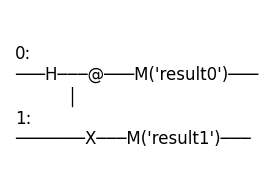

In [11]:
# The following is to save the circuit of each platform in an image

from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
import io
import sys

# Redirect the standard output to a string buffer
stdout = sys.stdout
sys.stdout = io.StringIO()

selected_framework = 'cirq' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# and the visualization of the results are 
#print("The results of our simulated circuit are: ")
#print(counts)

printed_circuit = sys.stdout.getvalue()

# Restore the standard output
sys.stdout = stdout
# Define the bbox
bbox = {'width': 100, 'height': 100}

# Save the printed circuit as an image with its exact size
plt.figure(figsize=(bbox['width'] / 50, bbox['height'] / 200), dpi=100)  # Convert from points to inches
plt.text(0.03, 0.1, printed_circuit, ha='left', va='top', wrap=True, fontsize=12)
plt.axis('off')
plt.savefig("circuit_result.jpg", bbox_inches='tight', pad_inches=0, dpi=100)

# Show the image
plt.show()

The results of our simulated circuit are: 
{'11': 517, '00': 483}


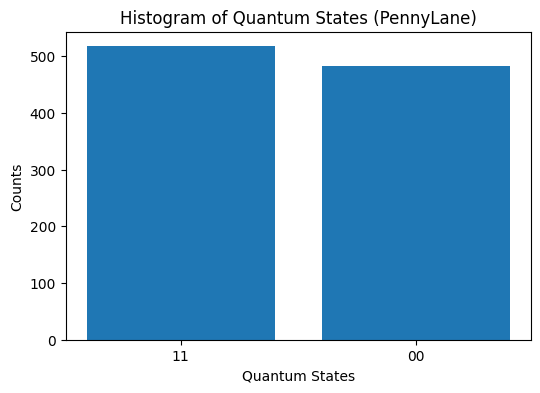

In [12]:
# and the following code is to save the image from the histogram

print("The results of our simulated circuit are: ")
print(counts)

# Create the bar plot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.bar(counts.keys(), counts.values())
plt.xlabel('Quantum States')
plt.ylabel('Counts')
plt.title('Histogram of Quantum States (PennyLane)')
plt.savefig("measurement_probabilities.jpg", bbox_inches='tight', pad_inches=0.1)
plt.show()